In [12]:
    #################################################  
    # logRegression: Logistic Regression  
    # Author : zouxy  
    # Date   : 2014-03-02  
    # HomePage : http://blog.csdn.net/zouxy09  
    # Email  : zouxy09@qq.com  
    #################################################  
      
    from numpy import *  
    import matplotlib.pyplot as plt  
    import time  
      
      
    # calculate the sigmoid function  
    def sigmoid(inX):  
        return 1.0 / (1 + exp(-inX))  
      
      
    # train a logistic regression model using some optional optimize algorithm  
    # input: train_x is a mat datatype, each row stands for one sample  
    #        train_y is mat datatype too, each row is the corresponding label  
    #        opts is optimize option include step and maximum number of iterations  
    def trainLogRegres(train_x, train_y, opts):  
        # calculate training time  
        startTime = time.time()  
      
        numSamples, numFeatures = shape(train_x)  
        alpha = opts['alpha']; maxIter = opts['maxIter']  
        weights = ones((numFeatures, 1))  
      
        # optimize through gradient descent algorilthm  
        for k in range(maxIter):  
            if opts['optimizeType'] == 'gradDescent': # gradient descent algorilthm  
                output = sigmoid(train_x * weights)  
                error = train_y - output  
                weights = weights + alpha * train_x.transpose() * error  
            elif opts['optimizeType'] == 'stocGradDescent': # stochastic gradient descent  
                for i in range(numSamples):  
                    output = sigmoid(train_x[i, :] * weights)  
                    error = train_y[i, 0] - output  
                    weights = weights + alpha * train_x[i, :].transpose() * error  
            elif opts['optimizeType'] == 'smoothStocGradDescent': # smooth stochastic gradient descent  
                # randomly select samples to optimize for reducing cycle fluctuations   
                dataIndex = list(range(numSamples))  
                for i in range(numSamples):  
                    alpha = 4.0 / (1.0 + k + i) + 0.01  
                    randIndex = int(random.uniform(0, len(dataIndex)))  
                    output = sigmoid(train_x[randIndex, :] * weights)  
                    error = train_y[randIndex, 0] - output  
                    weights = weights + alpha * train_x[randIndex, :].transpose() * error  
                    del(dataIndex[randIndex]) # during one interation, delete the optimized sample  
            else:  
                raise NameError('Not support optimize method type!')  
          
      
        print('Congratulations, training complete! Took : ' + str(time.time() - startTime))
        return weights  
      
      
    # test your trained Logistic Regression model given test set  
    def testLogRegres(weights, test_x, test_y):  
        numSamples, numFeatures = shape(test_x)  
        matchCount = 0  
        for i in range(numSamples):  
            predict = sigmoid(test_x[i, :] * weights)[0, 0] > 0.5  
            if predict == bool(test_y[i, 0]):  
                matchCount += 1  
        accuracy = float(matchCount) / numSamples  
        return accuracy  
      
      
    # show your trained logistic regression model only available with 2-D data  
    def showLogRegres(weights, train_x, train_y):  
        # notice: train_x and train_y is mat datatype  
        numSamples, numFeatures = shape(train_x)  
        if numFeatures != 3:  
            print("Sorry! I can not draw because the dimension of your data is not 2!"  )
            return 1  
      
        # draw all samples  
        for i in range(numSamples):  
            if int(train_y[i, 0]) == 0:  
                plt.plot(train_x[i, 1], train_x[i, 2], 'or')  
            elif int(train_y[i, 0]) == 1:  
                plt.plot(train_x[i, 1], train_x[i, 2], 'ob')  
      
        # draw the classify line  
        min_x = min(train_x[:, 1])[0, 0]  
        max_x = max(train_x[:, 1])[0, 0]  
        weights = weights.getA()  # convert mat to array  
        y_min_x = float(-weights[0] - weights[1] * min_x) / weights[2]  
        y_max_x = float(-weights[0] - weights[1] * max_x) / weights[2]  
        plt.plot([min_x, max_x], [y_min_x, y_max_x], '-g')  
        plt.xlabel('X1'); plt.ylabel('X2')  
        plt.show()  

step 1: load data...
step 2: training...
Congratulations, training complete! Took : 0.10173988342285156
step 3: testing...
step 4: show the result...
The classify accuracy is: 96.000%


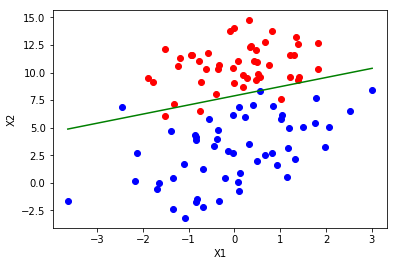

In [13]:
from numpy import *  
import matplotlib.pyplot as plt  
import time  
  
def loadData():  
    train_x = []  
    train_y = []  
    fileIn = open('testSet.txt')  
    for line in fileIn.readlines():  
        lineArr = line.strip().split()  
        train_x.append([1.0, float(lineArr[0]), float(lineArr[1])])  
        train_y.append(float(lineArr[2]))  
    return mat(train_x), mat(train_y).transpose()  
  
  
## step 1: load data  
print("step 1: load data...")  
train_x, train_y = loadData()  
test_x = train_x; test_y = train_y  
  
## step 2: training...  
print("step 2: training...")  
opts = {'alpha': 0.01, 'maxIter': 20, 'optimizeType': 'smoothStocGradDescent'}  
optimalWeights = trainLogRegres(train_x, train_y, opts)  
  
## step 3: testing  
print("step 3: testing..." ) 
accuracy = testLogRegres(optimalWeights, test_x, test_y)  
  
## step 4: show the result  
print("step 4: show the result...")    
print('The classify accuracy is: %.3f%%' % (accuracy * 100))
showLogRegres(optimalWeights, train_x, train_y)

In [14]:
train_x

matrix([[  1.00000000e+00,  -1.76120000e-02,   1.40530640e+01],
        [  1.00000000e+00,  -1.39563400e+00,   4.66254100e+00],
        [  1.00000000e+00,  -7.52157000e-01,   6.53862000e+00],
        [  1.00000000e+00,  -1.32237100e+00,   7.15285300e+00],
        [  1.00000000e+00,   4.23363000e-01,   1.10546770e+01],
        [  1.00000000e+00,   4.06704000e-01,   7.06733500e+00],
        [  1.00000000e+00,   6.67394000e-01,   1.27414520e+01],
        [  1.00000000e+00,  -2.46015000e+00,   6.86680500e+00],
        [  1.00000000e+00,   5.69411000e-01,   9.54875500e+00],
        [  1.00000000e+00,  -2.66320000e-02,   1.04277430e+01],
        [  1.00000000e+00,   8.50433000e-01,   6.92033400e+00],
        [  1.00000000e+00,   1.34718300e+00,   1.31755000e+01],
        [  1.00000000e+00,   1.17681300e+00,   3.16702000e+00],
        [  1.00000000e+00,  -1.78187100e+00,   9.09795300e+00],
        [  1.00000000e+00,  -5.66606000e-01,   5.74900300e+00],
        [  1.00000000e+00,   9.31635000e